In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27.0,NaN,NaN
1,85.0,64.0,59.0,NaN,23.0,0.0
2,86.0,54.0,33.0,16.0,54.0,0.0
3,91.0,78.0,34.0,24.0,36.0,0.0
4,NaN,55.0,13.0,17.0,17.0,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22.0,35.0,4.0
341,89.0,48.0,32.0,22.0,14.0,4.0
342,NaN,52.0,22.0,23.0,34.0,4.0
343,95.0,NaN,21.0,27.0,47.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	90
float64		column 2	90
float64		column 3	66
float64		column 4	46
float64		column 5	22
float64		column 6	88


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,255.000000,255.000000,279.000000,299.000000,323.000000,257.000000
mean,90.019608,68.521569,30.519713,24.421405,37.792570,3.342412
std,3.852038,16.369940,19.703161,9.138917,38.920651,3.365651
min,65.000000,36.000000,4.000000,5.000000,5.000000,0.000000
25%,88.000000,57.500000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,24.000000,3.000000
75%,92.000000,77.000000,34.000000,27.000000,43.500000,5.000000
max,101.000000,123.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

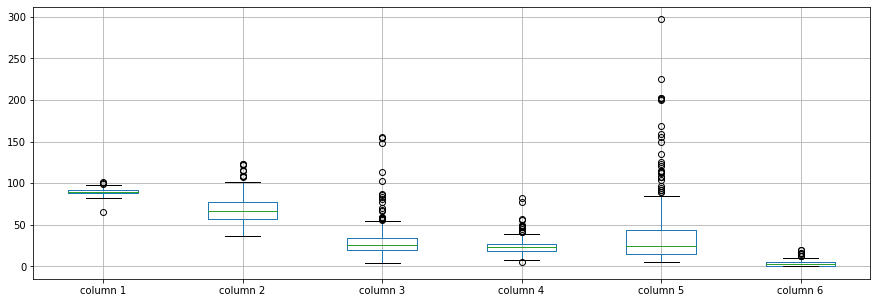

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:

df.mean()

column 1    90.019608
column 2    68.521569
column 3    30.519713
column 4    24.421405
column 5    37.792570
column 6     3.342412
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.026835,0.088299,0.099493,0.182783,0.301135
column 2,0.026835,1.000000,0.048411,0.181585,0.171658,0.161149
column 3,0.088299,0.048411,1.000000,0.705665,0.473685,0.142273
column 4,0.099493,0.181585,0.705665,1.000000,0.527046,0.152219
column 5,0.182783,0.171658,0.473685,0.527046,1.000000,0.300072
column 6,0.301135,0.161149,0.142273,0.152219,0.300072,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+40,6+40+40,6+40+40+40,6+40+40+40+40,6+40+40+40,6+40+40,6+40,6], vae_layer = False, seed = 400)
imputer.build_model(df)
imputer.train_model(training_epochs=40)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 221.13774036225817
Epoch: 1 , loss: 221.23297191801527
Epoch: 2 , loss: 222.86045837402344
Epoch: 3 , loss: 222.01376342773438
Epoch: 4 , loss: 221.62162490118118
Epoch: 5 , loss: 219.5005376906622
Epoch: 6 , loss: 221.7274925595238
Epoch: 7 , loss: 221.45559692382812
Epoch: 8 , loss: 220.92848786853608
Epoch: 9 , loss: 220.19659641810827
Epoch: 10 , loss: 220.9063262939453
Epoch: 11 , loss: 221.5376695905413
Epoch: 12 , loss: 218.52333359491257
Epoch: 13 , loss: 221.28142438616072
Epoch: 14 , loss: 221.5011712937128
Epoch: 15 , loss: 220.27362714494978
Epoch: 16 , loss: 220.15559605189733
Epoch: 17 , loss: 220.02547636486236
Epoch: 18 , loss: 219.8123532249814
Epoch: 19 , loss: 218.24540565127418
Epoch: 20 , loss: 221.21390133812315
Epoch: 21 , loss: 221.2544679187593
Epoch: 22 , loss: 221.78116062709265
Epoch: 23 , loss: 220.504887172154
Epoch: 24 , loss: 216.03897676013764
Epoch: 25 , loss: 220.28075

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.00000
column 2    47.00000
column 3    28.00000
column 4    15.00000
column 5    18.00000
column 6     0.64292
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.000000,0.000000,0.0,0.000000,15.001495,1.780577
1,0.000000,0.000000,0.0,-24.494146,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,-84.844112,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
340,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
341,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
342,-43.229256,0.000000,0.0,0.000000,0.000000,0.000000
343,0.000000,-50.046906,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

824.5865403233461

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.3272477758751608

In [19]:
new_df.iloc[66,:]

column 1    86.000000
column 2    43.303314
column 3    20.000000
column 4    21.000000
column 5    16.000000
column 6     3.206995
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.000000,92.000000,45.0,27.000000,46.001495,1.780577
1,85.000000,64.000000,59.0,7.505854,23.000000,0.000000
2,86.000000,54.000000,33.0,16.000000,54.000000,0.000000
3,91.000000,78.000000,34.0,24.000000,36.000000,0.000000
4,13.155888,55.000000,13.0,17.000000,17.000000,0.000000
...,...,...,...,...,...,...
340,91.000000,54.000000,25.0,22.000000,35.000000,4.000000
341,89.000000,48.000000,32.0,22.000000,14.000000,4.000000
342,41.770744,52.000000,22.0,23.000000,34.000000,4.000000
343,95.000000,42.953094,21.0,27.000000,47.000000,6.000000


In [24]:
imputations[-1].to_excel("Bupa_NN_20(imp).xlsx", index=False, header=False)